In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline,Pipeline,TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay,confusion_matrix,f1_score

In [4]:
from sklearn.cluster import KMeans

###### KMeans on generated data

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X,y = make_blobs(n_samples=200, centers=4, random_state=0, cluster_std=0.6,n_features=2)

In [7]:
data = pd.DataFrame({'X1':X[:,0],'X2':X[:,1]})
original_data = data.copy()
data.head(6) 

,X1,X2
0,2.234210,1.693495
1,-1.055107,2.638031
2,1.082726,4.062719
3,-2.601594,7.221956
4,1.608415,0.401801
5,0.982570,5.375310


In [8]:
data.describe()

,X1,X2
count,200.000000,200.000000
mean,0.001844,3.992074
std,1.659207,2.537509
min,-2.843759,-0.436378
25%,-1.467371,1.986834
50%,-0.157936,3.564273
75%,1.498092,5.816047
max,3.485154,9.189494


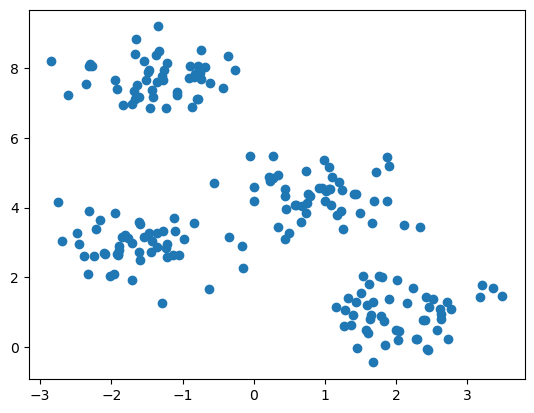

In [9]:
plt.scatter(data.X1,data.X2)
plt.show()

In [10]:
model = KMeans(n_clusters=2)
model.fit(data)
model.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0])

In [11]:
data['y'] = model.labels_

In [12]:
model.cluster_centers_

array([[ 0.4565224 ,  2.71231278],
       [-1.29223949,  7.6344709 ]])

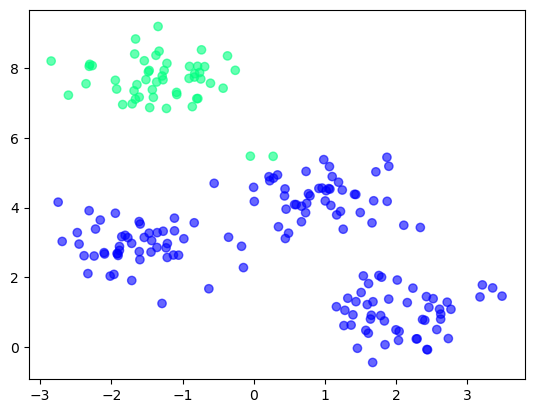

In [13]:
plt.scatter(data.X1,data.X2,c=data.y, alpha=0.6,cmap='winter')
plt.show()

In [14]:
model.score(data[['X1','X2']],data['y'])

-779.234676986062

##### Elbow Method to find best K value

In [15]:
inertia = []
for i in range(1,10):
    model = KMeans(i)
    model.fit_predict(data)
    inertia.append(model.inertia_)

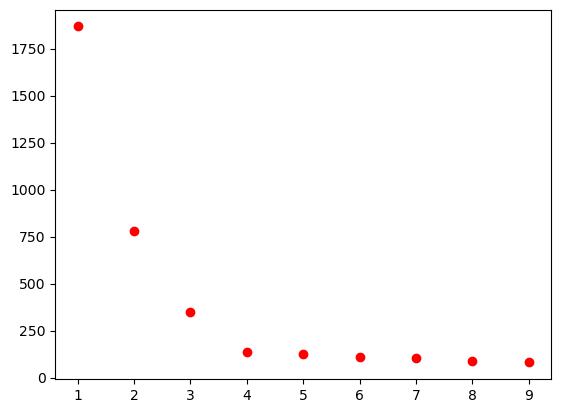

In [16]:
plt.scatter(x=[i for i in range(1,10)],y=inertia,c='red')
plt.show()

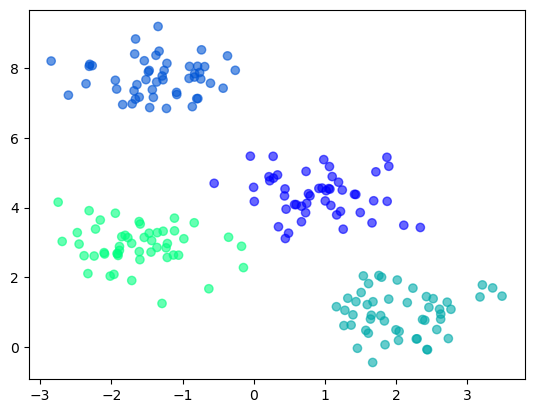

In [17]:
model = KMeans(n_clusters=4)
model.fit_predict(data)
plt.scatter(data.X1,data.X2,c=model.predict(data), alpha=0.6,cmap='winter')
plt.show()

In [18]:
model.score(data,model.predict(data))

-137.31229388282523

Hence the best K-value is 4 for the given dataset

#### K-Means on Iris Dataset

In [19]:
# from sklearn.datasets import load_iris
# iris_data = load_iris()
# iris_data.feature_names

In [20]:
iris_data = pd.read_csv('IRIS_dataset.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

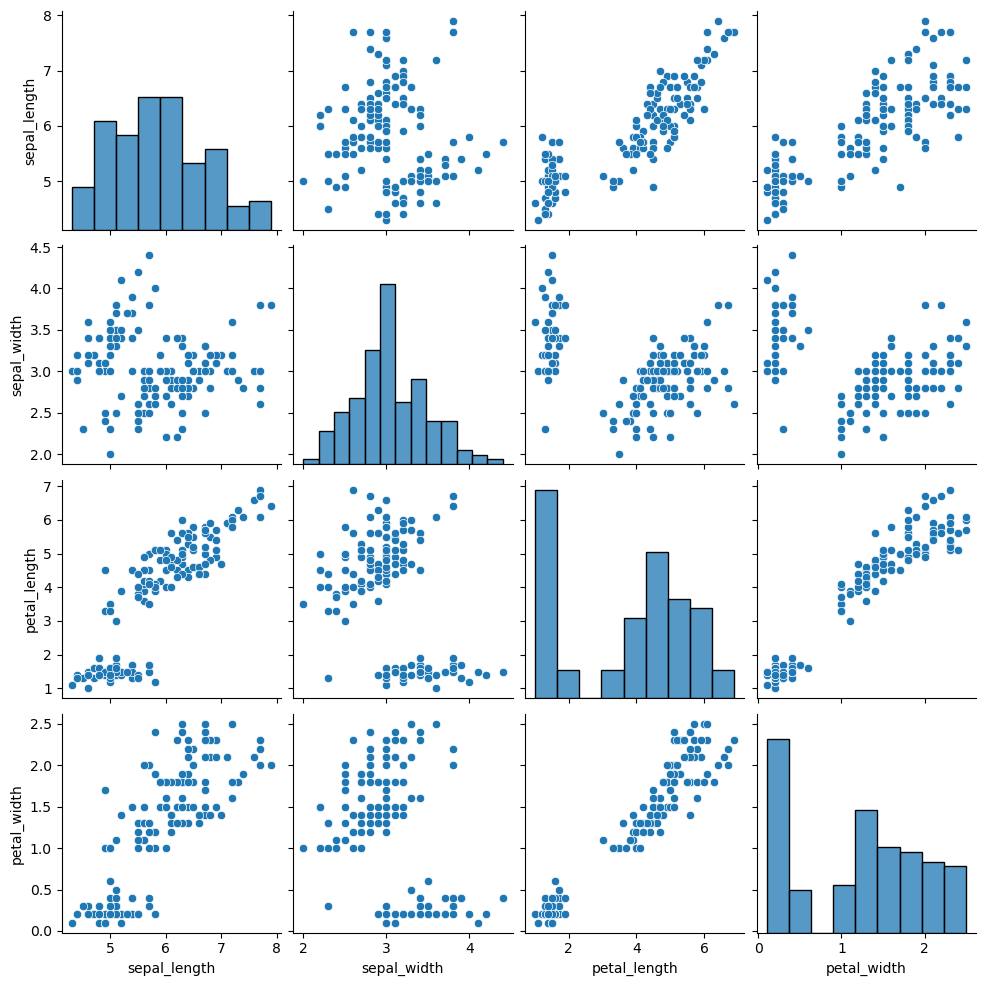

In [22]:
sns.pairplot(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.show()

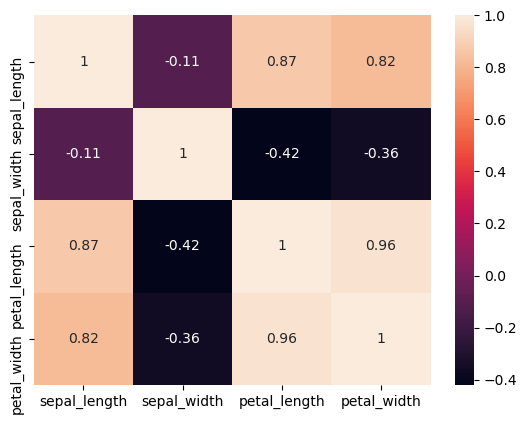

In [23]:
sns.heatmap(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(),annot=True)
plt.show()

In [24]:
X = iris_data[['sepal_length', 'sepal_width','petal_length', 'petal_width']]
y = iris_data['species']

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=0
# )

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [26]:
# n_components = 150
# pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

In [27]:
inertia = []
for i in range(1,10):
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit_predict(X)
    inertia.append(kmeans_model.inertia_)

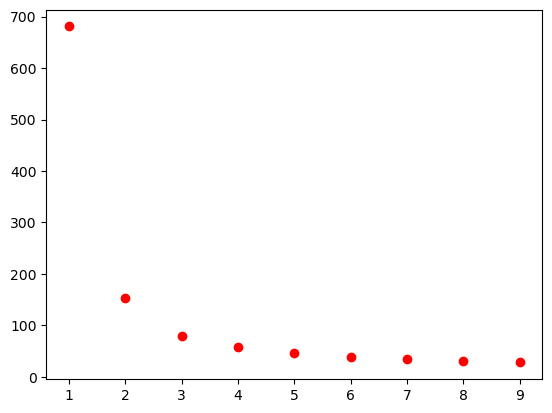

In [28]:
plt.scatter(x=[i for i in range(1,10)],y=inertia,c='red')
plt.show()

In [29]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit_predict(X)
kmeans_model.score(X,kmeans_model.predict(X))

-78.94084142614602

In [30]:
kmeans_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

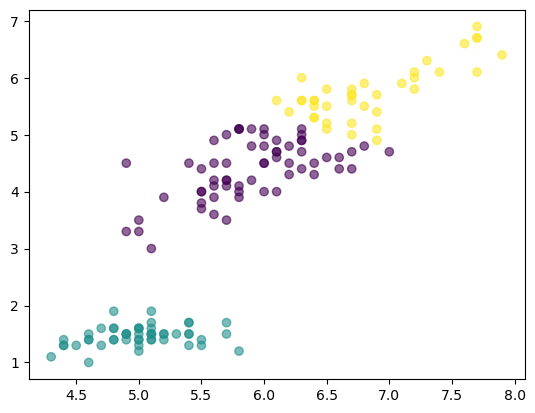

In [31]:
plt.scatter(X.sepal_length,X.petal_length,c=kmeans_model.predict(X), alpha=0.6, cmap='viridis_r')
plt.show()

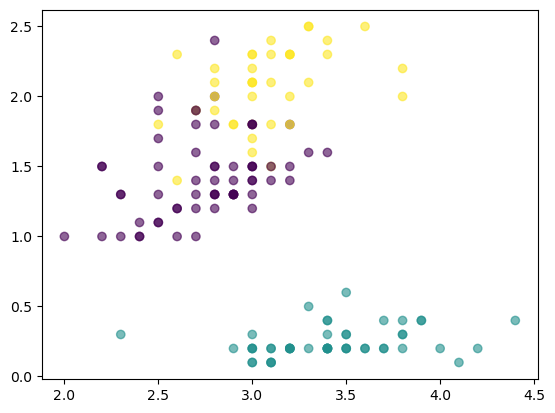

In [32]:
plt.scatter(X.sepal_width,X.petal_width,c=kmeans_model.predict(X), alpha=0.6, cmap='viridis_r')
plt.show()